In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is 
import sklearn
from sklearn import metrics
assert sklearn.__version__ >= "0.20"
from sklearn.model_selection import train_test_split


# Common imports
import numpy as np
import pandas as pd
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

brain =pd.read_csv('C:/Users/Basit/Downloads/brain_stroke_in_numeric_without_useless_data22.csv')
brain=brain.drop(brain.columns[0], axis=1)
brain_pca = pd.read_csv('C:/Users/Basit/Downloads/brain_stroke_after_pca23.csv')
brain_pca = brain_pca.drop(brain_pca.columns[0], axis=1) 
print(brain_pca)
print(brain)


      principal component 1  principal component 2  stroke
0                  2.314804               1.701292       1
1                  1.334051               0.494870       1
2                  1.763879              -0.538178       1
3                  2.150142               1.065223       1
4                  1.938705               1.232691       1
...                     ...                    ...     ...
4976              -0.736223               0.449289       0
4977               1.439055               1.221043       0
4978               2.011923              -0.146382       0
4979               0.749794               0.022445       0
4980               1.963507               0.006951       0

[4981 rows x 3 columns]
      gender   age  hypertension  heart_disease  ever_married  \
0          0  67.0             0              1             1   
1          0  80.0             0              1             1   
2          1  49.0             0              0             1   
3      

In [2]:
X = brain.iloc[:, [5,6]].to_numpy()
y = brain.iloc[:, 8].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

tree_clf = DecisionTreeClassifier(max_depth=2,random_state=42)
y_pred = tree_clf.fit(X_train, y_train).predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9478260869565217


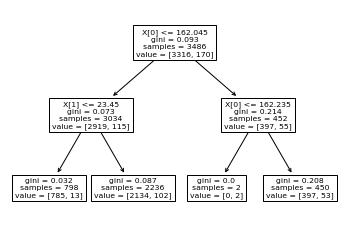

In [3]:
plot_tree(tree_clf);

In [4]:
X = brain.iloc[:, [1,5]].to_numpy()
y = brain.iloc[:, 8].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

tree_clf = DecisionTreeClassifier(max_depth=2,random_state=42)
y_pred = tree_clf.fit(X_train, y_train).predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9478260869565217


Accuracy: 0.9478260869565217


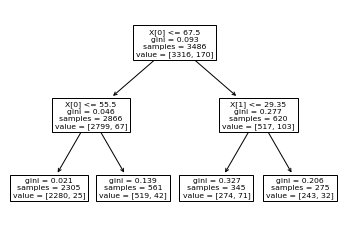

In [5]:
X = brain.iloc[:, [1,6]].to_numpy()
y = brain.iloc[:, 8].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

tree_clf = DecisionTreeClassifier(max_depth=2,random_state=42)
y_pred = tree_clf.fit(X_train, y_train).predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
plot_tree(tree_clf);

In [6]:
X = brain.iloc[:, [1,6]].to_numpy()
y = brain.iloc[:, 8].to_numpy()
class EnsembleClasifier():

    def __init__(self,base_classifier,labels):
        self.classifier = [base_classifier]
        self.labels = labels
    def add_classifier(self,classifier):
        self.classifier.append(classifier)
    def remove_last_classifier(self):
        self.classifier.pop(-1)
    def predict_proba(self,X):
        return np.array([clf.predict_proba(X) for clf in self.classifier]).sum(axis=0)/len(self.classifier)
    def predict(self,X):
        return labels[np.argmax(self.predict_proba(X),axis=1)]
    def error(self,X,y):
        return 1 - accuracy_score(y,ensembleClasifier.predict(X))

class Artificial_data():

    def __init__(self,X,y,dtypes):
        self.dtypes = {}
        self._generator = {}
        self.labels = y.unique()
        for c,dtype in zip(X.columns,dtypes):
            self.dtypes[c] = dtype
            if dtype == 'numeric':
                self._generator[c] = {'mean':X[c].mean(),'std':X[c].std()}
            else:
                unique_values = X[c].value_counts() / X.shape[0]
                self._generator[c] = {'values':unique_values.index,'prob':unique_values.values}

    def sample_generator(self,ensembleClasifier,nb_samples=1):
        syn_X = pd.DataFrame()
        for c in self.dtypes.keys():
            if self.dtypes[c] == 'numeric':
                syn_X[c] = np.random.normal(self._generator[c]['mean'],self._generator[c]['std'],nb_samples)
            else:
                syn_X[c] = np.random.choice(self._generator[c]['values'],p=self._generator[c]['prob'],
                                             size=nb_samples,replace=True)
        p_hat = ensembleClasifier.predict_proba(syn_X)
        p_hat[p_hat==0] = 1e-5
        inverse_p = 1/p_hat
        new_p = inverse_p / inverse_p.sum(axis=1)[:, np.newaxis]
        syn_y = [np.random.choice(self.labels,p=new_p[i]) for i in range(nb_samples)]
        return syn_X,syn_y  


import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import datasets
iris = datasets.load_iris()
X, y = iris.data, iris.target
X_train_base, X_test, y_train_base, y_test = train_test_split( pd.DataFrame(X), pd.Series(y), 
                                                              test_size = 0.3, random_state = 100)

# dtypes=['numeric' for _ in range(7)] + ['nominal'] #use this for abalone dataset
dtypes=['numeric' for _ in range(4)]
np.random.seed(1)
artifical_data = Artificial_data(X_train_base,y_train_base,dtypes)

c_size = 15
i_max = 300 
R_size = len(X_train_base)
i = 1
trails =1
labels = np.unique(y_train_base)
clf_entropy = DecisionTreeClassifier(random_state = 1, max_depth=2)
clf_entropy.fit(X_train_base, y_train_base)


ensembleClasifier = EnsembleClasifier(clf_entropy,labels)
error_bst = ensembleClasifier.error(X_train_base,y_train_base)

while (i<c_size and trails<i_max):
    X_syn,y_syn =artifical_data.sample_generator(ensembleClasifier,R_size)
    X_train=pd.concat([X_train_base,X_syn],axis=0)
    y_train=np.append(y_train_base,y_syn,axis=0)

    C_prime=DecisionTreeClassifier( random_state = 1, max_depth=2)
    C_prime.fit(X_train, y_train)

    ensembleClasifier.add_classifier(C_prime)

    error_i = ensembleClasifier.error(X_train_base,y_train_base)

    if error_i <= error_bst:
        print('improvement')
        error_bst = error_i
        print(error_i)
        i += 1
    else:
        ensembleClasifier.remove_last_classifier()

    trails +=1

improvement
0.03809523809523807
improvement
0.03809523809523807
improvement
0.03809523809523807
improvement
0.03809523809523807
improvement
0.01904761904761909
improvement
0.01904761904761909
improvement
0.01904761904761909
improvement
0.01904761904761909
improvement
0.01904761904761909
improvement
0.01904761904761909
improvement
0.01904761904761909
improvement
0.01904761904761909
improvement
0.01904761904761909
improvement
0.01904761904761909


In [ ]:
from chefboost import Chefboost as chef
import pandas as pd
config = {'algorithm': 'C4.5'}

model = chef.fit(brain, config, target_label = 'stroke')
for index, instance in brain.iterrows():
    prediction=chef.predict(model,instance)
    actual=instance['stroke']
    print(actual,"-",prediction)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
X = brain.iloc[:, [5,6]].to_numpy()
y = brain.iloc[:, 8].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X, y, cv=5)
print(scores)